In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [7]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(41.20833333333333, 0.5, 'Inches')


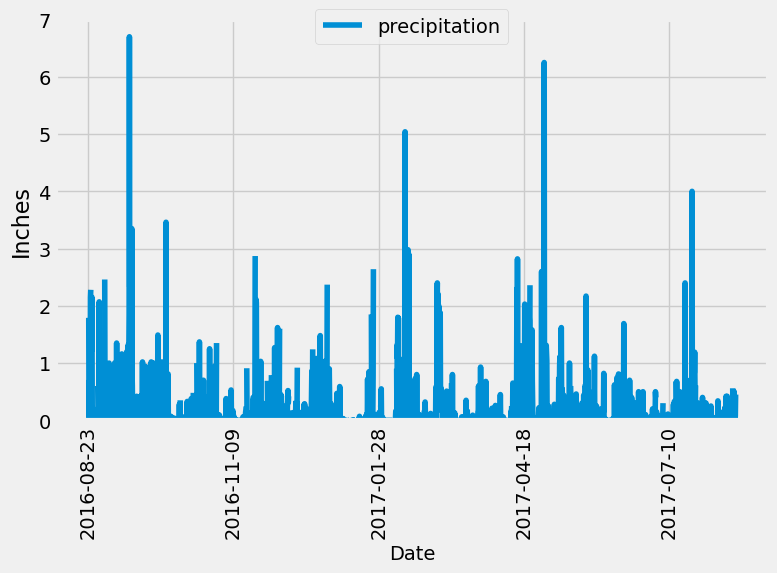

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df_sorted = precipitation_df.sort_values(by='date')

# Ensure the DataFrame has the correct structure with 'date' as the index
precipitation_df_sorted.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the data with the appropriate figsize and labels
ax = precipitation_df_sorted.plot(y='precipitation', figsize=(8, 6), legend=False)

# Add axis labels as in your example
plt.xlabel('Date', fontsize=14)
plt.ylabel('Inches', fontsize=16)

# Customize the y-axis limit to match the example (if needed)
plt.ylim(0, 7)

# Add the y-axis label and capture the returned Text object
y_label = plt.ylabel('Inches', fontsize=16)

# Customize the legend position (placing it inside the plot)
ax.legend(['precipitation'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=1)

# Customize tick parameters to match the desired appearance
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Adjust the layout to avoid clipping
plt.tight_layout()

# Print the Text object for the y-axis label
print(y_label)

# Show the plot
plt.show()


In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Display the summary statistics
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

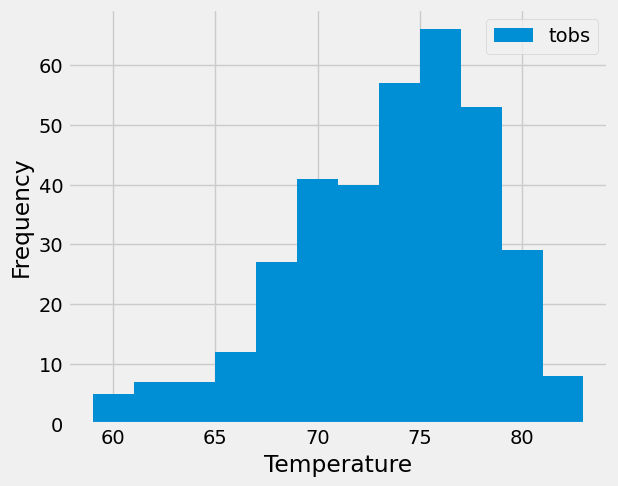

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()
